<a href="https://colab.research.google.com/github/charlie-aashutosh/IIT-JODHPUR-ML-/blob/main/Linear_Regression_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

Step 1 : Gathering the data

In [2]:
data=pd.read_csv("/content/data.csv")

In [3]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


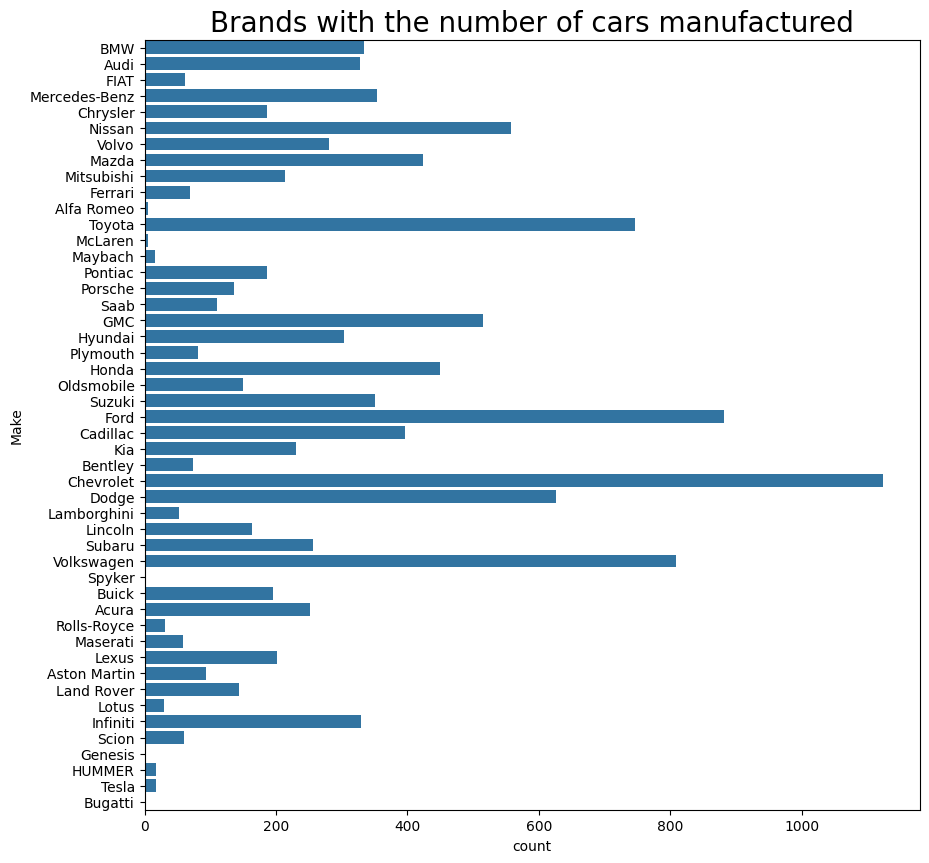

In [5]:
plt.figure(figsize=(10,10))
snr.countplot(y=data.Make)
plt.title("Brands with the number of cars manufactured",fontsize=20)
plt.show()

<ipython-input-9-2ac7fef8632e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  snr.countplot(x='Vehicle Size',data=data,palette='Set1')


Text(0.5, 1.0, 'Count of manufactured vehicles based on Vehicle size')

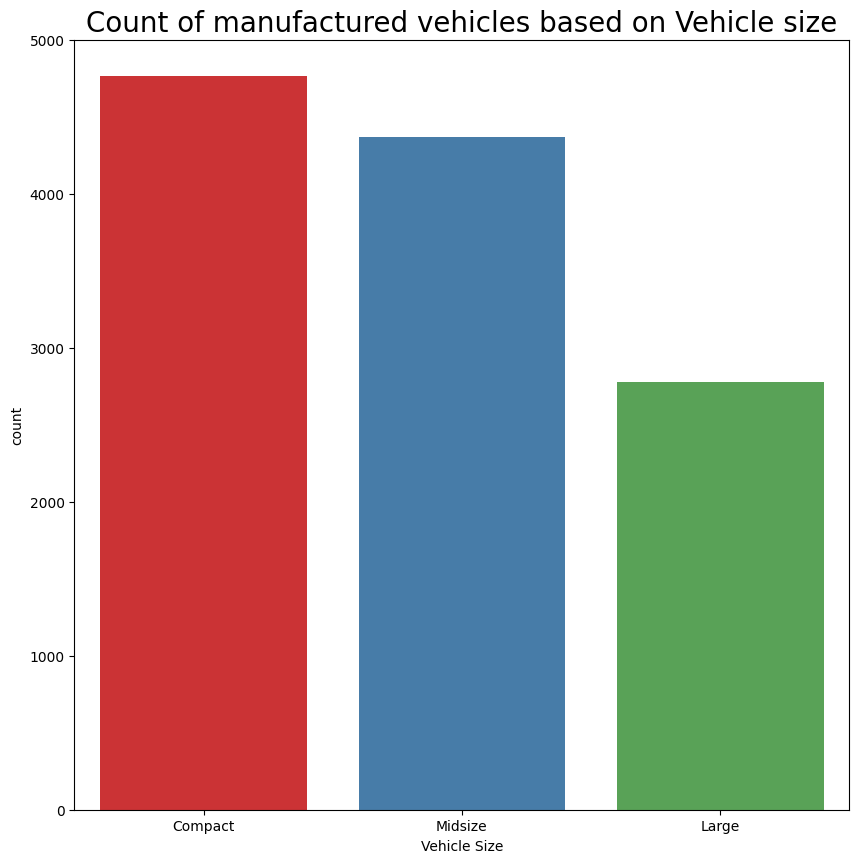

In [9]:
plt.figure(figsize=(10,10))
snr.countplot(x='Vehicle Size',data=data,palette='Set1')
plt.title("Count of manufactured vehicles based on Vehicle size",fontsize=20)

<ipython-input-8-e8d3cb4a04e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  snr.countplot(x='Transmission Type',data=data,palette='Set1')


<Axes: xlabel='Transmission Type', ylabel='count'>

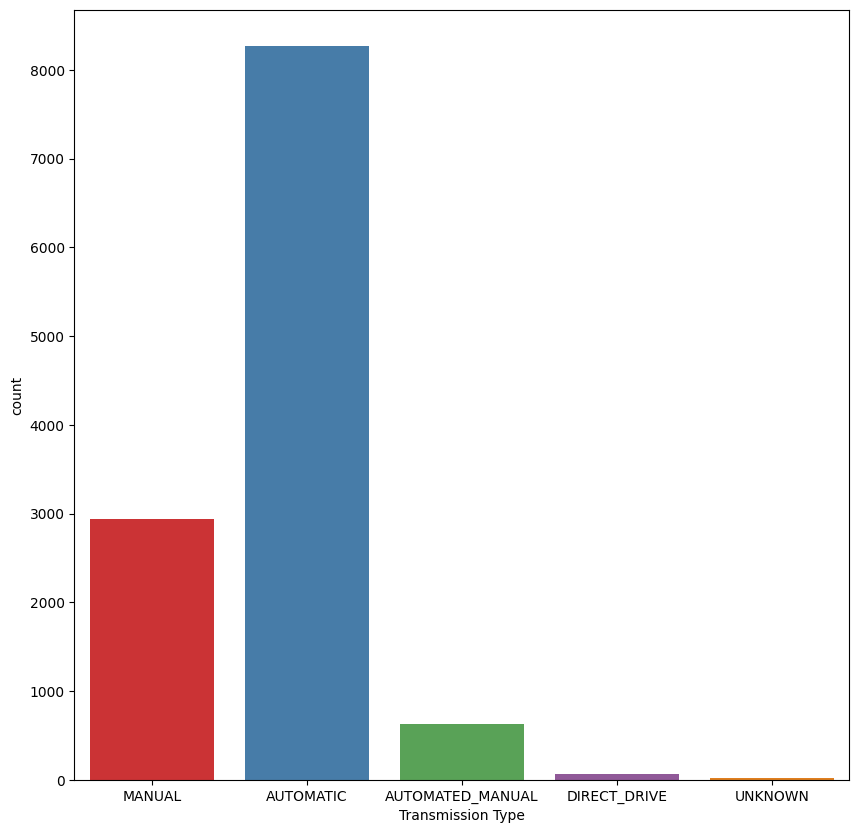

In [8]:
plt.figure(figsize=(10,10))
snr.countplot(x='Transmission Type',data=data,palette='Set1')

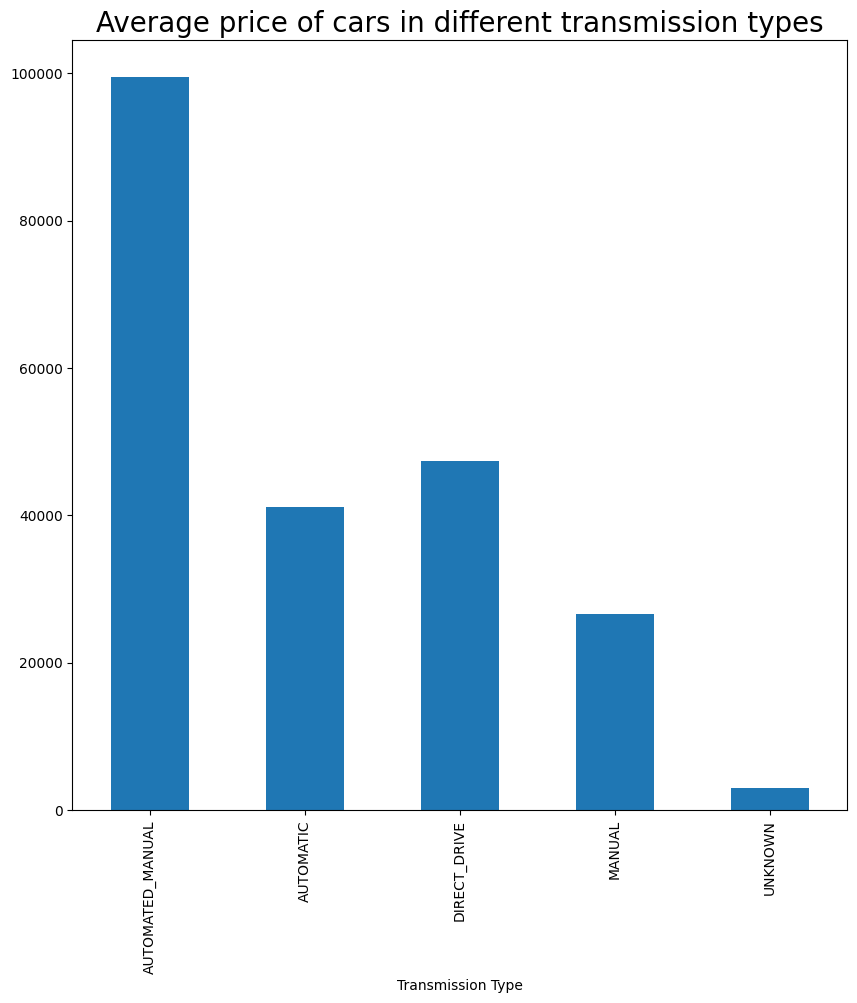

In [10]:
plt.figure(figsize=(10,10))
data.groupby('Transmission Type')['MSRP'].mean().plot(kind='bar')
plt.title("Average price of cars in different transmission types",fontsize=20)
plt.show()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Step 2 : Data preprocessing

In [15]:
#converting the categorical variables into numeric format -- LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [16]:
data['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [17]:
data['Engine Fuel Type']=label_encoder.fit_transform(data['Engine Fuel Type'])

In [18]:
data['Engine Fuel Type'].unique()

array([ 8,  9,  7,  4,  0,  1,  2,  6,  3,  5, 10])

In [20]:
data['Make'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [21]:
data['Make']=label_encoder.fit_transform(data['Make'])

In [22]:
data['Make'].unique()

array([ 4,  3, 12, 31, 10, 33, 47, 29, 32, 13,  1, 45, 30, 28, 36, 37, 39,
       15, 19, 35, 18, 34, 43, 14,  8, 21,  5,  9, 11, 22, 25, 42, 46, 41,
        7,  0, 38, 27, 24,  2, 23, 26, 20, 40, 16, 17, 44,  6])

In [23]:
data['Model'].unique()

array(['1 Series M', '1 Series', '100', '124 Spider', '190-Class',
       '2 Series', '200', '200SX', '240SX', '240', '2',
       '3 Series Gran Turismo', '3 Series', '300-Class', '3000GT', '300',
       '300M', '300ZX', '323', '350-Class', '350Z', '360', '370Z', '3',
       '4 Series Gran Coupe', '4 Series', '400-Class', '420-Class',
       '456M', '458 Italia', '4C', '4Runner', '5 Series Gran Turismo',
       '5 Series', '500-Class', '500e', '500', '500L', '500X', '550',
       '560-Class', '570S', '575M', '57', '599', '5',
       '6 Series Gran Coupe', '6 Series', '600-Class', '6000',
       '612 Scaglietti', '626', '62', '650S Coupe', '650S Spider', '6',
       '7 Series', '718 Cayman', '740', '760', '780', '8 Series', '80',
       '850', '86', '9-2X', '9-3 Griffin', '9-3', '9-4X', '9-5', '9-7X',
       '9000', '900', '90', '911', '928', '929', '940', '944', '960',
       '968', 'A3', 'A4 allroad', 'A4', 'A5', 'A6', 'A7', 'A8',
       'Acadia Limited', 'Acadia', 'Accent', 'Acclaim'

In [24]:
data['Model']=label_encoder.fit_transform(data['Model'])

In [25]:
data['Model'].unique()

array([  1,   0,   2,   3,   4,   6,   7,   8,  10,   9,   5,  13,  12,
        15,  16,  14,  17,  18,  19,  20,  21,  22,  23,  11,  25,  24,
        26,  27,  28,  29,  30,  31,  34,  33,  36,  39,  35,  37,  38,
        40,  41,  43,  44,  42,  45,  32,  48,  47,  49,  50,  51,  53,
        52,  54,  55,  46,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  67,  66,  68,  69,  70,  73,  72,  71,  74,  75,  76,  77,
        78,  79,  80,  81,  83,  82,  84,  85,  86,  87,  95,  94,  96,
        97,  99, 100, 101,  98, 102, 103, 104, 105, 106, 107, 108, 109,
       904, 903,  88,  89, 110, 112, 111, 113,  90, 114, 115, 116, 117,
       119, 118,  92,  93,  91, 120, 121, 123, 122, 124, 125, 126, 127,
       128, 129, 130, 132, 131, 133, 135, 136, 134, 137, 139, 141, 140,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 152, 154,
       155, 138, 156, 157, 160, 161, 162, 163, 164, 186, 185, 187, 188,
       190, 189, 191, 193, 194, 192, 195, 196, 197, 198, 199, 20

In [27]:
data['Transmission Type'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [28]:
data['Transmission Type']=label_encoder.fit_transform(data['Transmission Type'])

In [29]:
data['Transmission Type'].unique()

array([3, 1, 0, 2, 4])

In [30]:
data['Driven_Wheels'].unique()

array(['rear wheel drive', 'front wheel drive', 'all wheel drive',
       'four wheel drive'], dtype=object)

In [32]:
data['Driven_Wheels']=label_encoder.fit_transform(data['Driven_Wheels'])

In [33]:
data['Driven_Wheels'].unique()

array([3, 2, 0, 1])

In [34]:
data['Market Category'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

In [36]:
data['Market Category']=label_encoder.fit_transform(data['Market Category'])

In [37]:
data['Market Category'].unique()

array([38, 67, 64, 63, 69, 41, 48, 71, 50, 59, 57, 65, 24, 60, 54, 61, 36,
       30, 25, 40,  0, 31, 32, 34, 39, 45, 16, 53, 11, 62, 68, 21, 20, 26,
       46,  7, 23, 51, 17, 18, 28, 29, 27, 56, 15, 58, 47, 22, 66,  9,  8,
       10, 52, 55, 37,  4,  5, 12, 14, 44, 49,  2,  3, 35, 33, 19, 43, 70,
        6,  1, 42, 13])

In [38]:
data['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [39]:
data['Vehicle Size']=label_encoder.fit_transform(data['Vehicle Size'])

In [40]:
data['Vehicle Size'].unique()

array([0, 2, 1])

In [41]:
data['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [42]:
data['Vehicle Style']=label_encoder.fit_transform(data['Vehicle Style'])

In [43]:
data['Vehicle Style'].unique()

array([ 8,  6, 14, 15,  2,  0,  3, 11,  4,  9, 13, 10,  1,  5,  7, 12])

In [44]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,2011,8,335.0,6.0,3,3,2.0,38,0,8,26,19,3916,46135
1,4,0,2011,8,300.0,6.0,3,3,2.0,67,0,6,28,19,3916,40650
2,4,0,2011,8,300.0,6.0,3,3,2.0,64,0,8,28,20,3916,36350
3,4,0,2011,8,230.0,6.0,3,3,2.0,67,0,8,28,18,3916,29450
4,4,0,2011,8,230.0,6.0,3,3,2.0,63,0,6,28,18,3916,34500


In [45]:
#checking for null values in the dataset
data.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Market Category       0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [46]:
data['Engine HP']=data['Engine HP'].fillna(data['Engine HP'].mode()[0])
data['Engine Cylinders']=data['Engine Cylinders'].fillna(data['Engine Cylinders'].mode()[0])
data['Number of Doors']=data['Number of Doors'].fillna(data['Number of Doors'].mode()[0])

In [47]:
data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

Step 3 : Dividing the data into X and y

In [50]:
X=data.drop(['MSRP'],axis=1) #independent variables
y=data['MSRP'] #dependent variables

In [51]:
X.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,4,1,2011,8,335.0,6.0,3,3,2.0,38,0,8,26,19,3916
1,4,0,2011,8,300.0,6.0,3,3,2.0,67,0,6,28,19,3916
2,4,0,2011,8,300.0,6.0,3,3,2.0,64,0,8,28,20,3916
3,4,0,2011,8,230.0,6.0,3,3,2.0,67,0,8,28,18,3916
4,4,0,2011,8,230.0,6.0,3,3,2.0,63,0,6,28,18,3916


Step 4 : Splitting the data into training and testing set